Chapter 12

# 从高斯条件概率到线性回归
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

此代码使用Iris数据集分析了目标变量 $Y$ 与特征变量 $X_1$, $X_2$, $X_3$ 之间的线性回归关系。通过均值向量、协方差矩阵的计算及线性回归模型的拟合，估计了 $Y$ 关于 $X$ 的条件期望。

### 1. 均值向量 $\mu$ 和协方差矩阵 $\Sigma$ 计算
代码首先计算数据集 $X$ 的均值向量 $\mu$ 和协方差矩阵 $\Sigma$。这些矩阵可用于确定特征之间的相关性：
$$
\mu = \begin{bmatrix} \mu_{X_1} \\ \mu_{X_2} \\ \mu_{X_3} \\ \mu_Y \end{bmatrix}, \quad \Sigma = \begin{bmatrix} \Sigma_{XX} & \Sigma_{XY} \\ \Sigma_{YX} & \Sigma_{YY} \end{bmatrix}
$$

### 2. 条件期望的推导
目标是找到 $Y$ 关于 $X$ 的线性条件期望 $E(Y|X) = b_0 + b^T X$，其中
$$
b = \Sigma_{YX} \Sigma_{XX}^{-1}, \quad b_0 = \mu_Y - b \cdot \mu_X
$$
其中 $\Sigma_{XX}$ 表示 $X$ 的子协方差矩阵，$\Sigma_{YX}$ 是 $Y$ 与 $X$ 的协方差。

### 3. 可视化 $\mu$ 和 $\Sigma$ 的热力图
代码使用热力图可视化均值向量 $\mu$ 和协方差矩阵 $\Sigma$，直观展示了各个特征的均值及协方差大小。

### 4. 计算系数向量 $b$ 和常数项 $b_0$
代码通过矩阵计算获得 $b$ 和 $b_0$，并通过热力图显示。$b$ 表示 $X$ 中各特征对 $Y$ 的贡献，而 $b_0$ 则是偏移量。

### 5. 使用 Statsmodels 库进行回归验证
最后，代码使用 `statsmodels` 库对 $X_1$, $X_2$, $X_3$ 和 $Y$ 进行线性回归建模。通过 `OLS` 方法拟合模型并输出回归结果，以验证 $b$ 和 $b_0$ 的计算结果。

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris
from scipy.stats import norm
import scipy
import seaborn as sns
from numpy.linalg import inv
from sympy import symbols
import statsmodels.api as sm

## 准备数据

In [2]:
iris = load_iris()  # 导入鸢尾花数据集

X = iris.data  # 获取数据集中的特征数据
y = iris.target  # 获取数据集中的标签数据

feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$',
                 'Petal length, $X_3$','Petal width, $X_4$']  # 设置特征名称

x_array = np.linspace(0,8,100)  # 生成0到8的100个等间距点
X_Y_df = pd.DataFrame(X, columns=feature_names)  # 将特征数据转换为DataFrame格式

## 计算均值向量的热力图

In [3]:
MU = X_Y_df.mean()  # 计算各特征的均值
MU = np.array([MU]).T  # 转置均值向量

Text(0.5, 1.0, 'Vector of $\\mu$')

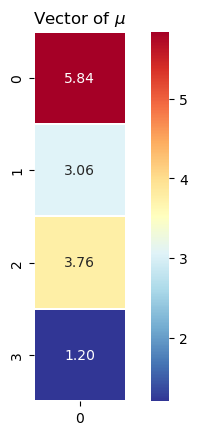

In [4]:
fig, axs = plt.subplots()  # 创建图形

h = sns.heatmap(MU,cmap='RdYlBu_r', 
                linewidths=.05,annot=True,fmt = '.2f')  # 绘制均值向量热力图
h.set_aspect("equal")  # 设置图形比例
h.set_title(r'Vector of $\mu$')  # 设置图形标题

## 计算协方差矩阵的热力图

In [5]:
SIGMA = X_Y_df.cov()  # 计算特征数据的协方差矩阵

Text(0.5, 1.0, 'Covariance matrix')

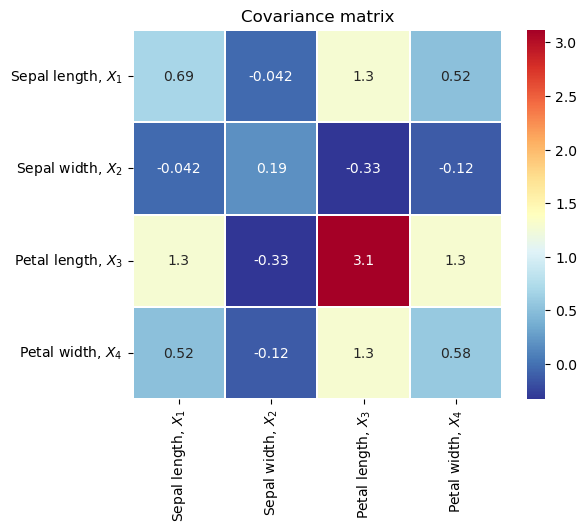

In [6]:
fig, axs = plt.subplots()  # 创建图形

h = sns.heatmap(SIGMA,cmap='RdYlBu_r', linewidths=.05,annot=True)  # 绘制协方差矩阵热力图
h.set_aspect("equal")  # 设置图形比例
h.set_title('Covariance matrix')  # 设置图形标题

## 矩阵运算

In [7]:
SIGMA = np.array(SIGMA)  # 将协方差矩阵转换为数组
x1, x2, x3 = symbols('x1 x2 x3')  # 定义符号变量x1, x2, x3

In [8]:
SIGMA_XX = SIGMA[0:3,0:3]  # 提取子协方差矩阵 XX

In [9]:
SIGMA_YX = SIGMA[3,0:3]  # 提取子协方差矩阵 YX
SIGMA_YX = np.matrix(SIGMA_YX)  # 将 YX 转换为矩阵

In [10]:
MU_Y = MU[3]  # 获取 Y 的均值
MU_Y = np.matrix(MU_Y)  # 转换为矩阵
MU_X = MU[0:3]  # 获取 X 的均值

In [11]:
x_vec = np.array([[x1,x2,x3]]).T  # 创建符号变量向量

In [12]:
y = SIGMA_YX@inv(SIGMA_XX)@(x_vec - MU_X) + MU_Y  # 计算条件期望

print(y)  # 输出条件期望

[[-0.20726607375743*x1 + 0.222828543860933*x2 + 0.524083114778431*x3 - 0.240307389112253]]


## 计算系数向量 b 和常数项 b0

In [13]:
b  = SIGMA_YX@inv(SIGMA_XX)  # 计算系数向量
b0 = MU_Y - b@MU_X  # 计算常数项

## 可视化系数矩阵

Text(0.5, 1.0, '$\\Sigma^{-1}_{XX}$')

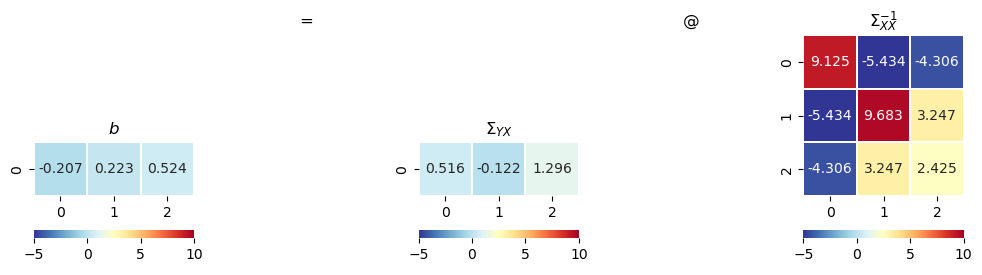

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(b, cmap ='RdYlBu_r', 
                 linewidths=.05,annot=True,
                 cbar_kws={"orientation": "horizontal"},fmt = '.3f',
                 vmax = 10, vmin = -5)  # 绘制系数矩阵热力图

ax.set_aspect("equal")  # 设置图形比例
plt.title(r'$b$')  # 设置标题

plt.sca(axs[1])
plt.title('=')  # 添加等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(SIGMA_YX,cmap='RdYlBu_r', linewidths=.05,annot=True,
                 cbar_kws={"orientation": "horizontal"},fmt = '.3f',
                 vmax = 10, vmin = -5)  # 绘制 YX 子矩阵热力图
ax.set_aspect("equal")  # 设置图形比例
plt.title(r'$\Sigma_{YX}$')  # 设置标题

plt.sca(axs[3])
plt.title('@')  # 添加乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(inv(SIGMA_XX),cmap='RdYlBu_r', linewidths=.05,annot=True,
                 cbar_kws={"orientation": "horizontal"},fmt = '.3f',
                 vmax = 10, vmin = -5)  # 绘制 XX 子矩阵的逆矩阵热力图
ax.set_aspect("equal")  # 设置图形比例
plt.title(r'$\Sigma^{-1}_{XX}$')  # 设置标题

## 可视化常数项 b0

Text(0.5, 1.0, '$\\mu_X$')

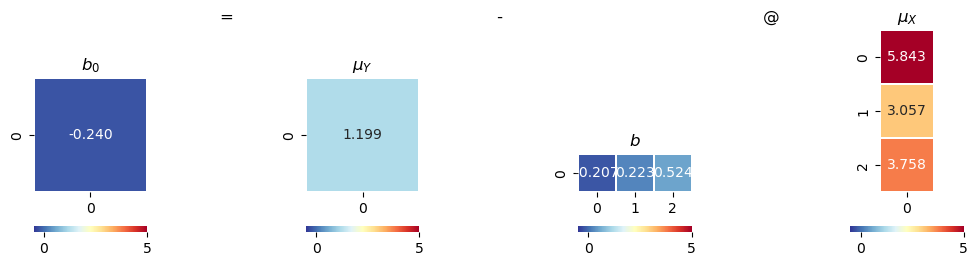

In [15]:
fig, axs = plt.subplots(1, 7, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(b0, cmap ='RdYlBu_r', 
                 linewidths=.05,annot=True,
                 cbar_kws={"orientation": "horizontal"},fmt = '.3f',
                 vmax = 5, vmin = -0.5)  # 绘制常数项热力图

ax.set_aspect("equal")  # 设置图形比例
plt.title(r'$b_0$')  # 设置标题

plt.sca(axs[1])
plt.title('=')  # 添加等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(MU_Y,cmap='RdYlBu_r', linewidths=.05,annot=True,
                 cbar_kws={"orientation": "horizontal"},fmt = '.3f',
                 vmax = 5, vmin = -0.5)  # 绘制 Y 的均值热力图
ax.set_aspect("equal")  # 设置图形比例
plt.title(r'$\mu_Y$')  # 设置标题

plt.sca(axs[3])
plt.title('-')  # 添加减号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(b,cmap='RdYlBu_r', linewidths=.05,annot=True,
                 cbar_kws={"orientation": "horizontal"},fmt = '.3f',
                 vmax = 5, vmin = -0.5)  # 绘制系数矩阵热力图
ax.set_aspect("equal")  # 设置图形比例
plt.title(r'$b$')  # 设置标题

plt.sca(axs[5])
plt.title('@')  # 添加乘号
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(MU_X,cmap='RdYlBu_r', linewidths=.05,annot=True,
                 cbar_kws={"orientation": "horizontal"},fmt = '.3f',
                 vmax = 5, vmin = -0.5)  # 绘制 X 的均值热力图
ax.set_aspect("equal")  # 设置标题
plt.title(r'$\mu_X$')  # 设置标题

## 使用 statsmodels 进行回归分析

In [16]:
X_df = X_Y_df[feature_names[0:3]]  # 选择前三个特征
y_df = X_Y_df[feature_names[3]]  # 选择第四个特征作为目标变量

In [17]:
X_df = sm.add_constant(X_df)  # 添加常数列用于回归截距

In [18]:
model = sm.OLS(y_df, X_df)  # 创建普通最小二乘回归模型
results = model.fit()  # 拟合模型
print(results.summary())  # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:     Petal width, $X_4$   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           7.83e-88
Time:                        13:48:09   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2403    

In [19]:
p = model.fit().params  # 获取回归系数
print(p)  # 输出回归系数

const                 -0.240307
Sepal length, $X_1$   -0.207266
Sepal width, $X_2$     0.222829
Petal length, $X_3$    0.524083
dtype: float64
